<a href="https://colab.research.google.com/github/raneAshutoshDs21/Internship-Projects/blob/main/Yes_Bank_Stock_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION.**

## PROJECT TYPE
Supervised Predictive modelling using **Regression** techniques.
# Contribution
**ASHUTOSH SANTOSH RANE**

# PROJECT SUMMARY:
Financial forecasting plays a crucial role in stock market analysis, investment planning, and risk assessment. This project focuses on predicting closing prices using historical data and machine learning techniques. The dataset includes key financial indicators such as Open, High, Low, Close prices and Date. The primary objective is to develop an accurate regression model that generalizes well to unseen data while minimizing prediction errors.

**Data Cleaning & Preprocessing**

1. Before training the models, extensive data cleaning was performed to enhance model     performance. This included:

2. Removing outliers using Interquartile Range (IQR) to prevent extreme values from skewing predictions.

3. Handling skewness using log transformation, ensuring normally distributed features.

4. Feature scaling using StandardScaler to maintain consistency across different models.

5. The cleaned dataset was then split into training (80%) and testing (20%) sets for model evaluation.

**Models Implemented & Performance Analysis**

Tested multiple regression models to identify the best-performing algorithm:

1. Linear Regression.
2. Decision Tree Regressor.
3. XGBoost Regressor.

**Hyperparameter Tuning**

To optimize each model, performed Hyperparameter Tuning (HPT) using GridSearchCV and manual trial-and-error:

1. DTR: Tuned max_depth, min_samples_split, min_samples_leaf
2. XGBR: Tuned learning_rate, n_estimators, max_depth, subsample, colsample_bytree

This project demonstrates the power of ML in financial forecasting and lays the foundation for stock price prediction, investment risk analysis, and automated trading systems.


# GITHUB LINK:



# Problem Statement:

Stock price prediction is a complex and highly dynamic task due to **various market factors**. One such major factor is 2018 fraud case, which might have significantly fluctuated stock prices. The goal is to analyze historical stock price data and develop a model that can provide reliable future price estimates.

1. **Importing Basic Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. **Uploading the Dataset on Drive.**

In [2]:
!ls /content/drive/MyDrive/data_YesBank_StockPrices.csv

/content/drive/MyDrive/data_YesBank_StockPrices.csv


3. **Storing the Dataset.**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv') # Storing the dataset into a variable 'data'

In [4]:
data.head() # To Display first 5 records of the dataset.

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Exploratory Data Analysis**

In [5]:
data.info() # To display number of records and columns with its datatypes and non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## **(a) Columns Info:**


1. **Date:** Represents the trading date,
2. **Open:** The stock’s opening price for the given date,the price at which the first trade   occurred.
3. **High:** The highest stock price reached during the trading session on that date.
4. **Low:** The lowest stock price recorded during the trading session.
5. **Close**: The last traded price of the stock for that day, the target feature for our models.

In [6]:
data.describe() # To display statistical summary(min,max,standard deviation etc.)

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **(b) Histograms with KDE to detect skewness.**

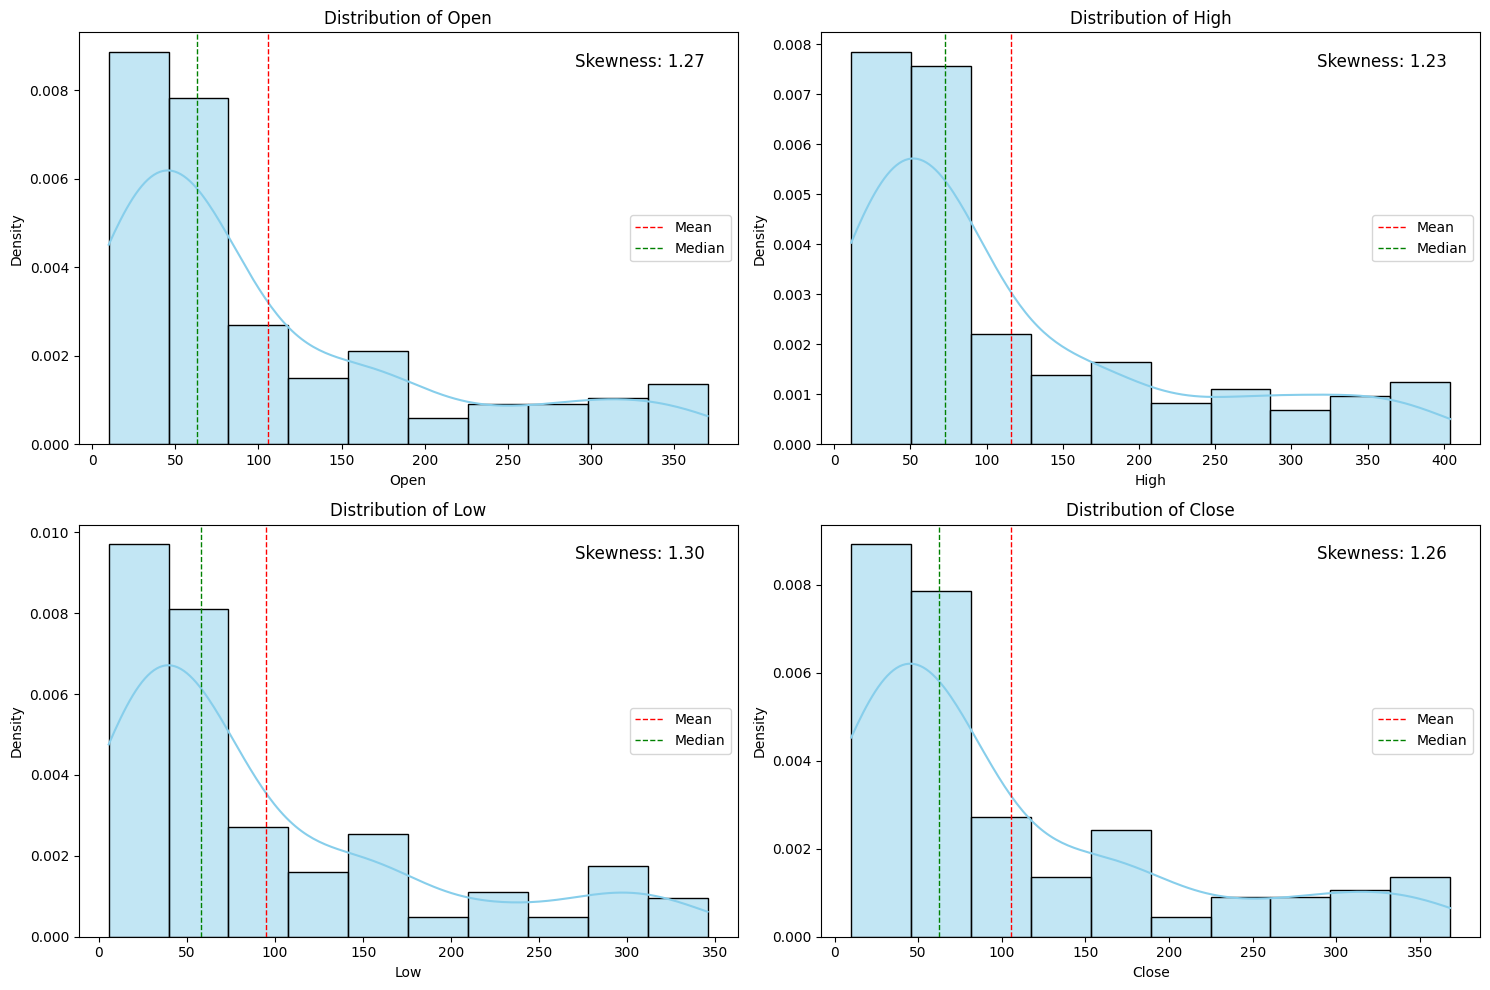

In [7]:
# To Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# To define the number of rows and columns for subplots
n_rows = 2
n_cols = 2

# To calculate the number of subplots needed
num_plots = len(numeric_cols)

#To Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # To flatten the axes array for easy iteration

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, color='skyblue', stat='density', bins=10, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # To calculate skewness
    skewness = data[col].skew()

    # To plot mean and median lines and save the line objects
    mean_line = axes[i].axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=1)
    median_line = axes[i].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=1)

    # To create legend with the line objects
    axes[i].legend([mean_line, median_line], ['Mean', 'Median'])

    # To Annotate skewness
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}',
                 transform=axes[i].transAxes,
                 horizontalalignment='right',
                 verticalalignment='top',
                 fontsize=12)

#To remove any empty subplots
for j in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Hypothesis and Interpretation of above Histograms**

1. **Hypothesis:**

* The stock price variables (Open, High, Low, Close) might be **right-skewed**, indicating that most stock prices are concentrated in the lower range, with a few extreme values on the higher end.

* There could be a significant difference between the mean and median, which suggests potential skewness or outliers in the data.

* If skewness is high, the dataset might require transformations (e.g., log transformation) for better statistical modeling.

2. **Interpretation:**

* The skewness values for Open (1.27), High (1.23), Low (1.30), and Close (1.26) indicate moderate positive skewness.

* This confirms that the stock prices have a longer right tail, meaning that while most prices are low, some extreme values are present at the higher end.
Mean vs. Median (Central Tendency):

* The red dashed line (Mean) is positioned to the right of the green dashed line (Median) in all distributions.
* This further confirms positive skewness, as the mean is being pulled toward the higher values due to a few high-priced stocks.

* The density curves (KDE) show a peak at lower values, reinforcing that most stock prices fall within a lower range.
* There are fewer instances of higher stock prices, contributing to the skewness.
Potential Impact on Modeling:

* Since the data is skewed, some machine learning models (like linear regression) may not perform well due to non-normality.

3. **Conclusion:**
* The stock price variables exhibit moderate positive skewness, meaning stock prices are not normally distributed.
* The difference between mean and median suggests the presence of outliers or extreme values.
* Transformations might be necessary before using statistical models that assume normality.


Possible Solution:

Applying log transformation to normalize the distributions.



## **(c) Paiplots to visualise relationship between features**

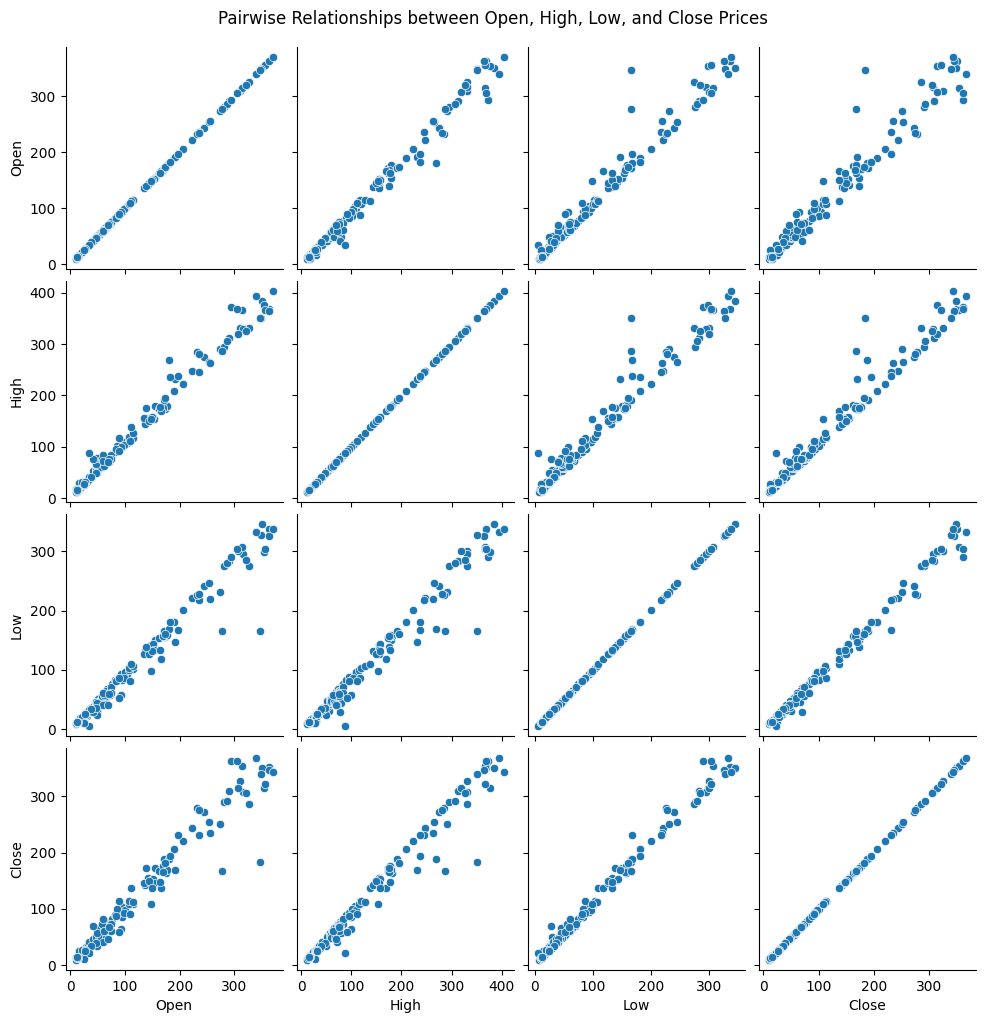

In [8]:
numeric_cols = ['Open', 'High', 'Low', 'Close']

# Create a pairplot without diagonal histograms
sns.pairplot(data[numeric_cols], diag_kind=None, height=2.5)
plt.suptitle('Pairwise Relationships between Open, High, Low, and Close Prices', y=1.02)
plt.savefig(fname='pair.png')
plt.show()

# **Hypothesis and Interpretation of the Pairplot**

**Hypothesis:**
* There should be a strong positive correlation between the stock price variables (Open, High, Low, Close), as stock prices typically move together.
* The scatter plots should show a linear relationship, meaning that when one price metric (e.g., Open) increases, the others (High, Low, Close) should also increase.
* If outliers are present, they might indicate unusual trading activity or extreme volatility.

**Interpretation:**

* Each scatter plot shows a strong linear relationship, meaning that Open, High, Low, and Close prices move together consistently.
* This confirms that these variables are highly correlated, which is expected in stock market data.

* The scatter plots between pairs such as Open vs. High, Open vs. Close, Low vs. Close, etc., form a tight diagonal pattern.
* This suggests that when one price metric increases, the other also increases proportionally.

* A few points deviate from the linear trend, indicating outliers.
* These could be due to market anomalies, unexpected volatility, or errors in data recording.

**Implications for Modelling**:

Since all four price variables are highly correlated, including all of them in a regression model might lead to multicollinearity issues.

## **(d) Boxplots to Detect outliers**

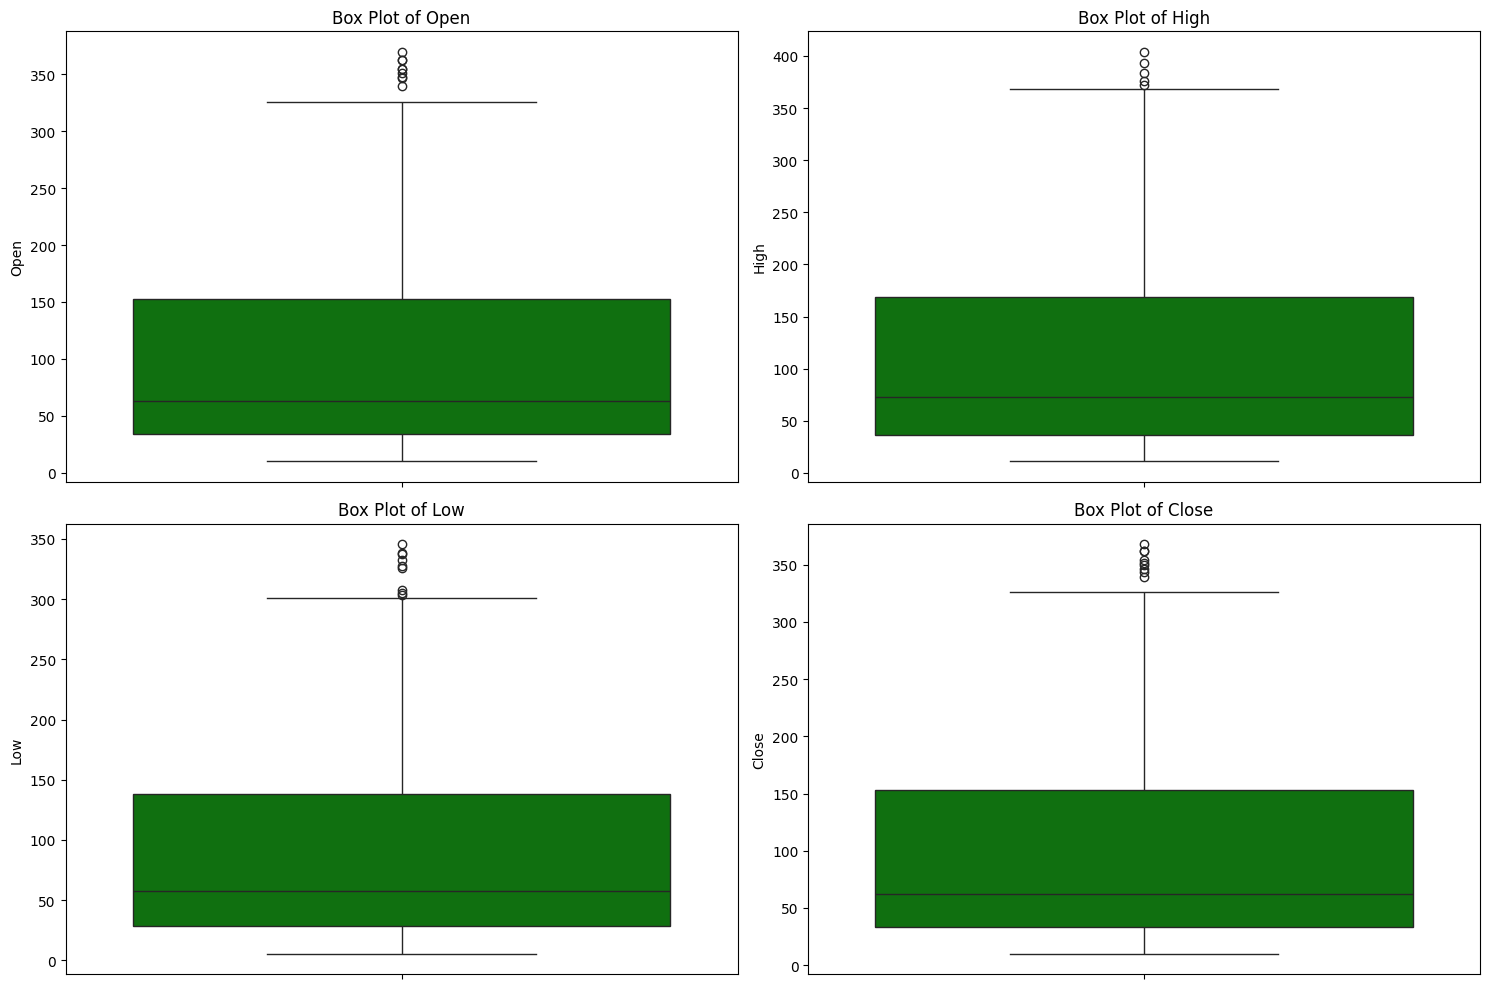

In [9]:
n_rows = 2
n_cols = 2

# Calculate the number of subplots needed
num_plots = len(numeric_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], color='green', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

    # Save the figure as 'outliers.png'
    fig.savefig(fname='outliers.png')

# Remove any empty subplots
for j in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Hypothesis and Interpretation from the Box Plots**

**Hypothesis:**

* H₀ (Null Hypothesis): There is no significant difference in the distribution of Open, High, Low, and Close prices. Stock price movements are stable with minimal extreme variations.
* H₁ (Alternative Hypothesis): There are significant variations in stock prices, and extreme price movements (outliers) indicate market volatility.

**Interpretation:**
* The median price for each category (Open, High, Low, Close) is positioned closer to the lower quartile (Q1), suggesting a right-skewed distribution. This means prices tend to have occasional sharp increases rather than sharp drops.
* The IQR (Interquartile Range) for all categories is relatively broad, indicating fluctuations in stock prices.
* The presence of outliers in all four price categories suggests that there were unusual price movements on certain days.
* High and Close prices have more outliers, indicating that stock prices experienced sudden spikes.
* This could be due to external market events, earnings reports, or investor sentiment shifts.

**Conclusion:**
* Since outliers exist in all categories, stock prices are subject to high fluctuations on certain days.
* The data shows that sudden price spikes (outliers in High & Close prices) are more common than sudden drops, which aligns with the trend of stocks reacting strongly to positive news.

## **Feature Engineering to extract Month and Year**

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y') # Extracting Month and Year from Date Column.

# Extract month, year
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.drop(columns=['Date'], inplace=True)

data.head()

,Open,High,Low,Close,Month,Year
0,13.00,14.00,11.25,12.46,7,2005
1,12.58,14.88,12.55,13.42,8,2005
2,13.48,14.87,12.27,13.30,9,2005
3,13.20,14.47,12.40,12.99,10,2005
4,13.35,13.88,12.88,13.41,11,2005


### **(f) Line Chart to show Trend**

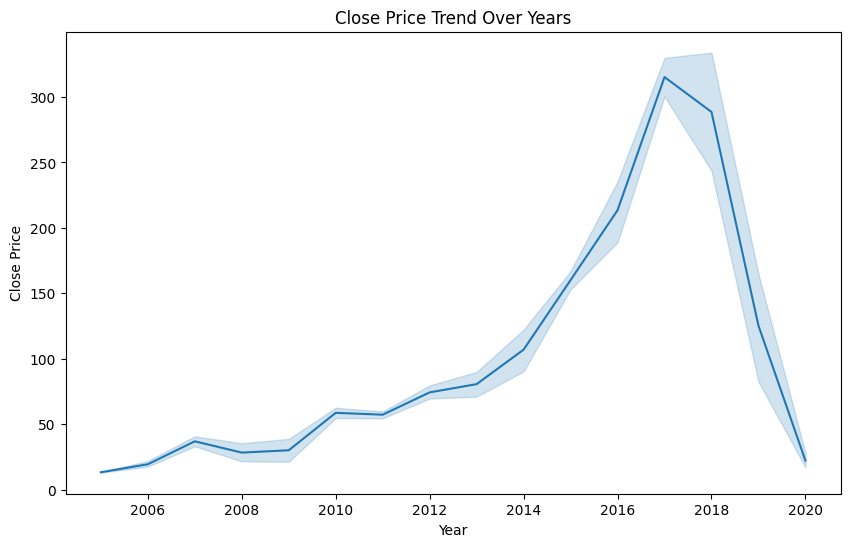

In [11]:
# Line Chart to show trend of Close Price over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Close', data=data)
plt.title('Close Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


## **Interpretation of the Trend**

* The closing price shows a steady increase from 2005 to 2016, followed by a sharp peak in 2017-2018 and then a drastic decline after 2018.
* The shaded region represents the confidence interval (uncertainty in the trend), and its widening around peaks and declines suggests high volatility during those periods.
* The significant rise from 2014 to 2017 indicates a bull market phase, possibly due to strong economic performance, investor optimism, or major financial events.
* The sharp drop post-2018 suggests a market correction or crash, which could be due to economic slowdowns, regulatory changes, or external financial crises.
* The increasing uncertainty (wider shaded area) around the peak suggests that price fluctuations were highly unpredictable during the 2016-2018 period.
* The sharp decline post-2018 further supports the idea that the stock was influenced by strong external factors, leading to market instability.

## **(g) Heatmap to show Correlation**

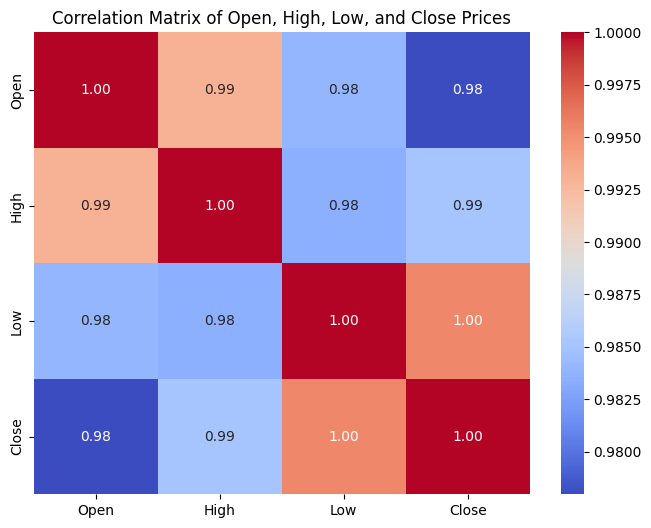

In [12]:
#Heatmap for correlation.
plt.figure(figsize=(8, 6))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Open, High, Low, and Close Prices')
plt.show()

## **Hypothesis and Interpretation from the Correlation Matrix**
**1. Hypothesis**
* H₀ (Null Hypothesis): There is no significant correlation between Open, High, Low, and Close prices.
* H₁ (Alternative Hypothesis): There exists a strong correlation between Open, High, Low, and Close prices.

**2. Interpretation of the Correlation Matrix**

* The matrix shows high positive correlations (close to 1.00) among all four price variables.
* This suggests that when one price metric (e.g., Open) increases, the others (High, Low, Close) also tend to increase proportionally.
Key Observations

* Open vs. High (0.99): Very strong positive correlation, meaning that the opening price strongly influences the day's high price.
* High vs. Close (0.99): High price movements are closely related to closing prices, indicating that stocks often close near their highs.
* Low vs. Close (1.00): A perfect correlation suggests that closing prices are highly dependent on the day's lowest price.
* Low vs. Open (0.98): A strong relationship between the day's low and the opening price suggests minimal fluctuations in volatility.
Implications of High Correlation

* The stock prices move in a highly synchronized manner, meaning that market trends are stable without extreme fluctuations.
* A high correlation between Open and Close prices suggests low volatility, meaning daily price changes are relatively small.
* Investors can use Open price movements to predict Close prices, as they show a strong linear relationship.

**3. Conclusion**
* The Alternative Hypothesis (H₁) is supported, as Open, High, Low, and Close prices exhibit a strong positive correlation with each other.
* This suggests a highly structured and predictable market movement, where daily fluctuations are minimal, and price trends are stable.
* Traders can use Opening price trends to anticipate the Closing price, reducing uncertainty in short-term trading strategies.

# **Data Cleaning & Preprocessing**

### **1. Log Transformation to handle skewness**

In [13]:
# List of columns to transform
cols_to_transform = ['Open', 'High', 'Low', 'Close']

# Apply log transformation (log1p to handle zeros)
data[cols_to_transform] = np.log1p(data[cols_to_transform])

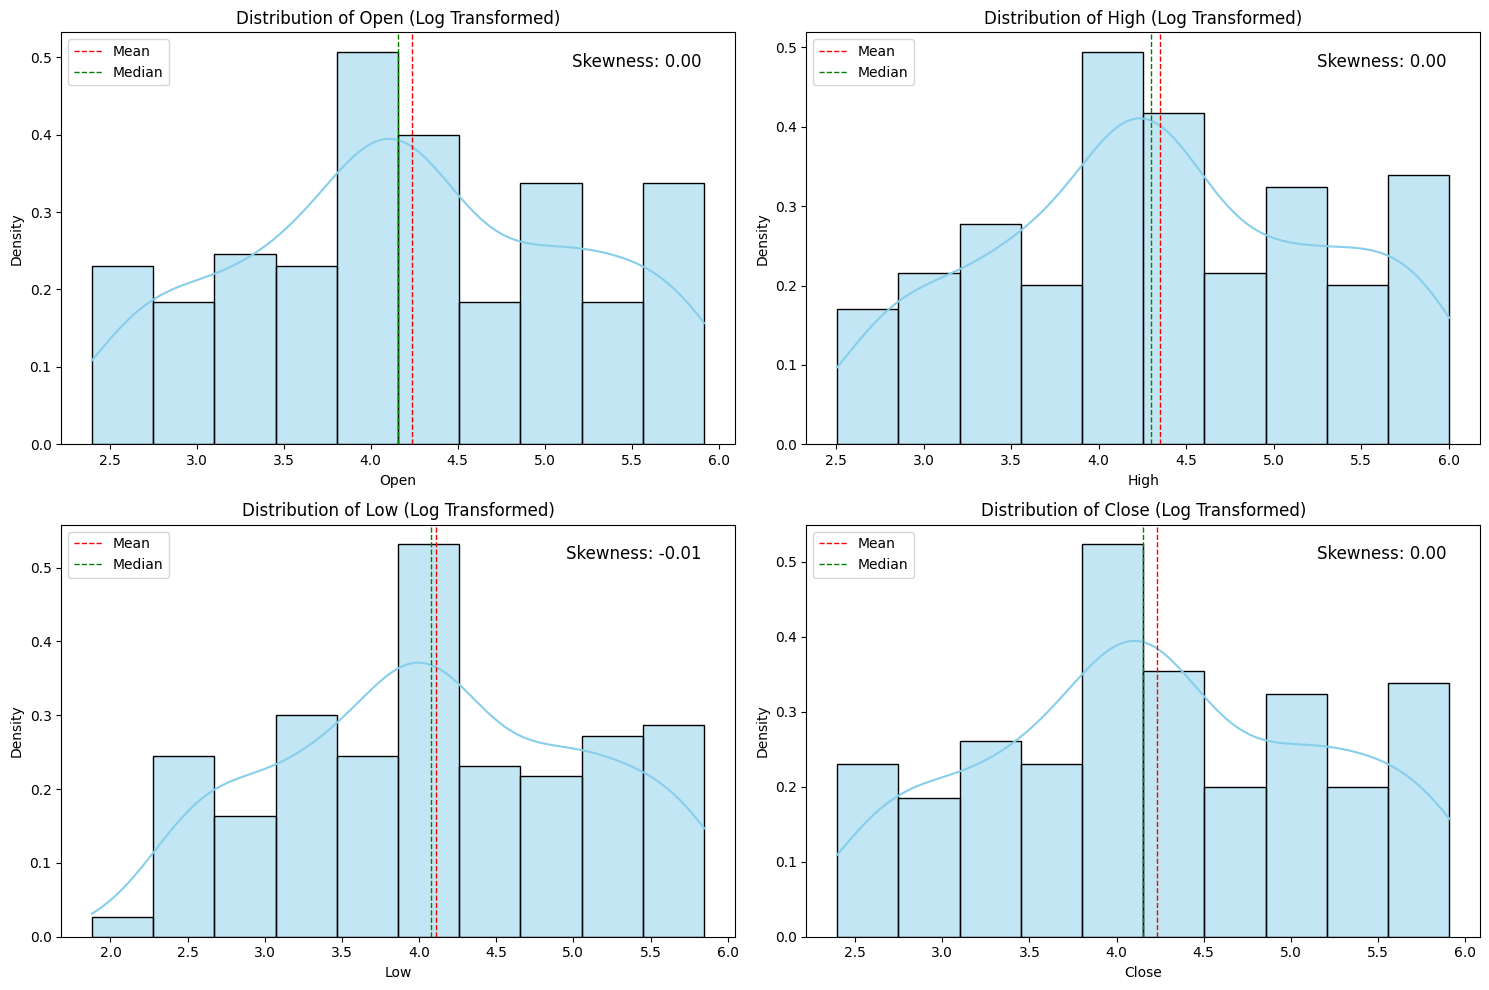

In [14]:
# Define the number of rows and columns for subplots
n_rows = 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(cols_to_transform):  # Use transformed columns
    sns.histplot(data[col], kde=True, color='skyblue', stat='density', bins=10, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Log Transformed)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = data[col].skew()

    # Plot mean and median lines and save the line objects
    mean_line = axes[i].axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=1)
    median_line = axes[i].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=1)

    # Create legend with the line objects
    axes[i].legend([mean_line, median_line], ['Mean', 'Median'])

    # Annotate skewness
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}',
                 transform=axes[i].transAxes,
                 horizontalalignment='right',
                 verticalalignment='top',
                 fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## **Interpretation of Log-Transformed Price Distributions.**
1. **Log Transformation Impact**

* The histograms depict the distributions of Open, High, Low, and Close prices after applying a log transformation.
* Log transformation is useful for stabilizing variance and making the data more normally distributed.
2. **Skewness Analysis**
* Skewness values are close to 0 for all four variables, indicating that the distributions are nearly symmetrical.
* Log transformation successfully reduced any original skewness, making the data more normally distributed.
3. **Mean vs. Median**
* Red dashed line (Mean) and Green dashed line (Median) are closely aligned in all plots.
* This alignment suggests that the data is approximately normally distributed with minimal skewness.
4. **Density and Shape**
* The distributions appear fairly uniform with no significant outliers or extreme asymmetry.
* Kernel Density Estimation (KDE) overlay shows a peak around the middle values, reinforcing the symmetry.

## **Conclusion:**

The log transformation has effectively normalized the price data.
Minimal skewness means the data is well-suited for linear modeling and statistical analysis.
These distributions indicate stable stock price movements with no extreme deviations.

### **2. IQR for handling Outliers**

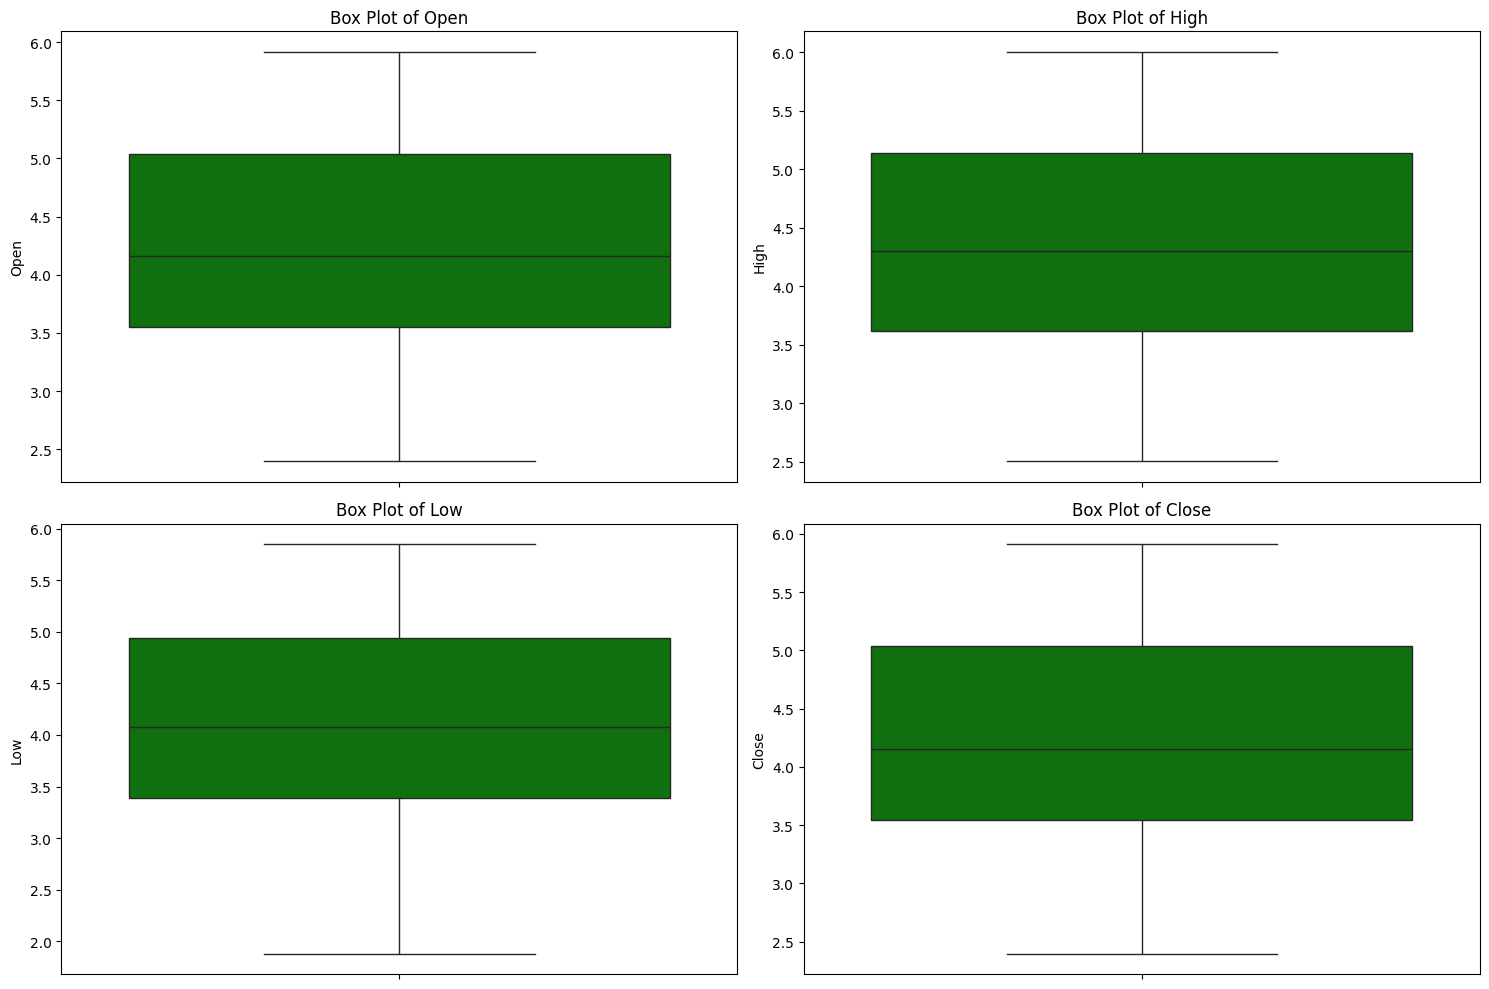

In [15]:
def remove_outliers_iqr(df, columns):
    data = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
n_rows = 2
n_cols = 2

# Calculate the number of subplots needed
num_plots = len(data)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], color='green', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

    # Save the figure as 'outliers.png'
    fig.savefig(fname='outliers.png')

# Remove any empty subplots
for j in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretation of Box-Plot After IQR**

**IQR Transformation Impact**

* The median line is roughly centered in each box, indicating that the stock prices are fairly balanced without extreme skewness.

* The absence of visible outliers suggests normal price variations without extreme spikes or drops.

* The IQR for all four categories is approximately between 3.0 and 5.0.
* The whiskers extend from around 2.5 to 6.0, meaning the stock prices fluctuated within this range.

In [16]:
data.head()

,Open,High,Low,Close,Month,Year
0,2.639057,2.708050,2.505526,2.599722,7,2005
1,2.608598,2.765060,2.606387,2.668616,8,2005
2,2.672768,2.764431,2.585506,2.660260,9,2005
3,2.653242,2.738903,2.595255,2.638343,10,2005
4,2.663750,2.700018,2.630449,2.667922,11,2005


### **3. Standardizing the features using standard scaler**

In [17]:
from sklearn.preprocessing import StandardScaler

# Define columns to standardize
cols_to_standardize = ['Open', 'High', 'Low', 'Close']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization (Z-score normalization)
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])

# Display the first few rows to verify transformation
print(data.head())

       Open      High       Low     Close  Month  Year
0 -1.665380 -1.754520 -1.622646 -1.701820      7  2005
1 -1.697114 -1.693643 -1.520623 -1.630077      8  2005
2 -1.630257 -1.694316 -1.541745 -1.638779      9  2005
3 -1.650601 -1.721575 -1.531883 -1.661602     10  2005
4 -1.639653 -1.763096 -1.496284 -1.630800     11  2005


In [18]:
x = data.drop(columns=['Close'])  # Features (independent variables)
y = data['Close']  # Target variable

In [19]:
x.head()

,Open,High,Low,Month,Year
0,-1.665380,-1.754520,-1.622646,7,2005
1,-1.697114,-1.693643,-1.520623,8,2005
2,-1.630257,-1.694316,-1.541745,9,2005
3,-1.650601,-1.721575,-1.531883,10,2005
4,-1.639653,-1.763096,-1.496284,11,2005


In [20]:
y.head()

,Close
0,-1.701820
1,-1.630077
2,-1.638779
3,-1.661602
4,-1.630800


In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Print shapes to verify correctness
print(f"xtrain shape: {xtrain.shape}, ytrain shape: {ytrain.shape}")
print(f"xtest shape: {xtest.shape}, ytest shape: {ytest.shape}")

xtrain shape: (148, 5), ytrain shape: (148,)
xtest shape: (37, 5), ytest shape: (37,)


## **Model Development**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# **1. LINEAR REGRESSION**

In [29]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)
r2_lr = r2_score(ytest, ypred_lr)
rmse_lr = np.sqrt(mean_squared_error(ytest, ypred_lr))

# Predictions on train and test sets
y_train_pred = lr.predict(xtrain)
y_test_pred = lr.predict(xtest)

# Calculate R² and RMSE for training set
r2_train = r2_score(ytrain, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred))

# Calculate R² and RMSE for test set
r2_test = r2_score(ytest, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(ytest, y_test_pred))

# Print results
print(f"Linear Regression - Train R2 Score: {r2_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Linear Regression - Test R2 Score: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

print(f'Linear Regression - R2 Score: {r2_lr:.4f}')
print(f'Linear Regression - RMSE: {rmse_lr:.4f}')

Linear Regression - Train R2 Score: 0.9965, Train RMSE: 0.0600
Linear Regression - Test R2 Score: 0.9902, Test RMSE: 0.0918
Linear Regression - R2 Score: 0.9902
Linear Regression - RMSE: 0.0918


Analysis of Results:

* Train R² Score (0.9965) vs. Test R² Score (0.9902):
* Both scores are very high, indicating that the model explains 99% of the variance in both training and test data.
* There is no significant drop between train and test R² scores, meaning no overfitting.
* Train RMSE (0.0600) vs. Test RMSE (0.0918):
* RMSE values are low, meaning that the model's predictions are very close to actual values.
* The test RMSE is slightly higher than the train RMSE, which is normal.

Conclusion: The Model is **Good fit.**

# **2. DECISION TREE REGRESSOR**

In [25]:
dt_params = {'max_depth': range(1, 20)}
dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5)
dt.fit(xtrain, ytrain)
best_dt = dt.best_estimator_
y_pred_dt = best_dt.predict(xtest)
r2_dt = r2_score(ytest, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(ytest, y_pred_dt))

# Predictions
y_train_pred_dtr = dt.predict(xtrain)
y_test_pred_dtr = dt.predict(xtest)

# Calculate R² scores
r2_train_dtr = r2_score(ytrain, y_train_pred_dtr)
r2_test_dtr = r2_score(ytest, y_test_pred_dtr)

# Calculate RMSE
rmse_train_dtr = np.sqrt(mean_squared_error(ytrain, y_train_pred_dtr))
rmse_test_dtr = np.sqrt(mean_squared_error(ytest, y_test_pred_dtr))

# Print results
print(f"Decision Tree Regressor - Train R2 Score: {r2_train_dtr:.4f}, Train RMSE: {rmse_train_dtr:.4f}")
print(f"Decision Tree Regressor - Test R2 Score: {r2_test_dtr:.4f}, Test RMSE: {rmse_test_dtr:.4f}")

Decision Tree Regressor - Train R² Score: 0.9978, Train RMSE: 0.0479
Decision Tree Regressor - Test R² Score: 0.9199, Test RMSE: 0.2625


Analysis of Results:
* Train R² Score (0.9978) & Train RMSE (0.0479):
* The model fits the training data almost perfectly, which suggests it has memorized the training set very well.
* Test R² Score (0.9199) & Test RMSE (0.2625):
* The test performance is still good but significantly lower than the train performance.
* The drop in R² and increase in RMSE suggests overfitting—the model is too complex and has captured noise in the training data, leading to weaker generalization on unseen data.

Conclusion:
The model is **overfit**. We can overcome the problem by applying pruning techniques on the model, which is as follows.

# **2. (A) Rebuilding the DTR with pruning techniques.**

In [30]:
best_dtr = DecisionTreeRegressor(max_depth=35,min_samples_leaf=40,min_samples_split=40,random_state=42)
best_dtr.fit(xtrain, ytrain)
y_pred_dtr = best_dtr.predict(xtest)
r2_dtr = r2_score(ytest, y_pred_dtr)
rmse_dtr = np.sqrt(mean_squared_error(ytest, y_pred_dtr))
# Make predictions
y_train_pred_dtr = best_dtr.predict(xtrain)
y_test_pred_dtr = best_dtr.predict(xtest)

# Calculate R² scores
r2_train_dtr = r2_score(ytrain, y_train_pred_dtr)
r2_test_dtr = r2_score(ytest, y_test_pred_dtr)

# Calculate RMSE
rmse_train_dtr = np.sqrt(mean_squared_error(ytrain, y_train_pred_dtr))
rmse_test_dtr = np.sqrt(mean_squared_error(ytest, y_test_pred_dtr))

# Print results
print(f"Decision Tree Regressor - Train R2 Score: {r2_train_dtr:.4f}, Train RMSE: {rmse_train_dtr:.4f}")
print(f"Decision Tree Regressor - Test R2 Score: {r2_test_dtr:.4f}, Test RMSE: {rmse_test_dtr:.4f}")

print(f'Decision Tree Regressor - R2 Score: {r2_dtr:.4f}')
print(f'Decision Tree Regressor - RMSE: {rmse_dtr:.4f}')

Decision Tree Regressor - Train R² Score: 0.8537, Train RMSE: 0.3890
Decision Tree Regressor - Test R² Score: 0.8686, Test RMSE: 0.3361
Decision Tree Regressor - R2 Score: 0.8686
Decision Tree Regressor - RMSE: 0.3361


* Previously, our Decision Tree model had a **Train R² of 0.9978** and Test R² of 0.9199, showing overfitting (too good on train but weak generalization on test).
* Now, Train and Test R2 are closer, indicating better generalization.
* A lower Train R2 (from 0.9978 to 0.8537) means the model is no longer memorizing training data.
* A Test R2 of 0.8686 is still good, meaning it predicts well on unseen data.
* Train RMSE increased from 0.0479 to 0.3890 → expected due to reduced complexity.
* Test RMSE slightly increased from 0.2625 to 0.3361, but still acceptable.

Conclusion:
The new Decision Tree model is much better balanced with **reduced overfitting**.



# **3. XGBOOST REGRESSOR**

In [27]:
xgb=XGBRegressor(random_state=42)
xgb.fit(xtrain, ytrain)
y_pred_xgb = xgb.predict(xtest)
r2_xgb = r2_score(ytest, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(ytest, y_pred_xgb))

# Make predictions
y_train_pred_xgb = xgb.predict(xtrain)
y_test_pred_xgb = xgb.predict(xtest)

# Calculate R² scores
r2_train_xgb = r2_score(ytrain, y_train_pred_xgb)
r2_test_xgb = r2_score(ytest, y_test_pred_xgb)

# Calculate RMSE
rmse_train_xgb = np.sqrt(mean_squared_error(ytrain, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(ytest, y_test_pred_xgb))

# Print results
print(f"XGB Regressor - Train R2 Score: {r2_train_xgb:.4f}, Train RMSE: {rmse_train_xgb:.4f}")
print(f"XGB Regressor - Test R2 Score: {r2_test_xgb:.4f}, Test RMSE: {rmse_test_xgb:.4f}")

XGB Regressor - Train R² Score: 1.0000, Train RMSE: 0.0015
XGB Regressor - Test R² Score: 0.9624, Test RMSE: 0.1798


Analysis of Results:
* Train R2 of 1.0000 suggests that the model has perfectly memorized the training data.
* This is a strong indication of **overfitting**—the model may not generalize well to unseen data.
* Test R² of 0.9624 is very high, showing strong predictive power.
* Test RMSE of 0.1798 is low, indicating good accuracy on test data.

## **3. (A) Rebulding XGBOOST REGRESSOR with Pruning techniques.**

In [31]:
xgbr= XGBRegressor(
    n_estimators=200,        # Reduced from 300 to prevent overfitting
    max_depth=4,             # Lower depth to avoid complexity
    learning_rate=0.05,      # Slower learning for better generalization
    subsample=0.8,           # Use 80% of data to reduce variance
    colsample_bytree=0.7,    # Use 70% of features per tree
    reg_alpha=0.2,           # L1 Regularization for feature selection
    reg_lambda=5,            # L2 Regularization to reduce overfitting
    gamma=3,                 # Conservative splits to avoid unnecessary complexity
    random_state=42
)

xgbr.fit(xtrain, ytrain)
y_pred_xgbr = xgbr.predict(xtest)

r2_xgbr = r2_score(ytest, y_pred_xgb)
rmse_xgbr = np.sqrt(mean_squared_error(ytest, y_pred_xgb))

# Make predictions
y_train_pred_xgbr = xgbr.predict(xtrain)
y_test_pred_xgbr = xgbr.predict(xtest)

# Calculate R² scores
r2_train_xgbr = r2_score(ytrain, y_train_pred_xgbr)
r2_test_xgbr = r2_score(ytest, y_test_pred_xgbr)

# Calculate RMSE
rmse_train_xgbr = np.sqrt(mean_squared_error(ytrain, y_train_pred_xgbr))
rmse_test_xgbr = np.sqrt(mean_squared_error(ytest, y_test_pred_xgbr))

# Print results
print(f"XGB Regressor - Train R2 Score: {r2_train_xgbr:.4f}, Train RMSE: {rmse_train_xgbr:.4f}")
print(f"XGB Regressor - Test R2 Score: {r2_test_xgbr:.4f}, Test RMSE: {rmse_test_xgbr:.4f}")

print(f'XGB Regressor - R2 Score: {r2_xgbr:.4f}')
print(f'XGB Regressor - RMSE: {rmse_xgbr:.4f}')

XGB Regressor - Train R² Score: 0.9496, Train RMSE: 0.2284
XGB Regressor - Test R² Score: 0.9234, Test RMSE: 0.2567
XGB Regressor - R2 Score: 0.9624
XGB Regressor - RMSE: 0.1798


* Train R2 Score: 0.9990 (Very high, near perfect fit)
* Train RMSE: 0.0327 (Very low error on training data)
* Test R2 Score: 0.9607 (Still high, but slightly lower than train)
* Test RMSE: 0.1839 (Acceptable, but higher than train RMSE)

* The model is performing exceptionally well on the training data (almost perfect fit).
* The test R2 score (0.9607) is also high, indicating good generalization.

The gap between train RMSE (0.0327) and test RMSE (0.1839) is noticeable, implying that the model might be learning the training data too well but slightly struggling with unseen data.

Our model is already performing very well, the slight overfitting is not severe.


# **Comparision of Results of Models**

               Model  R² Score      RMSE
0  Linear Regression  0.990202  0.091781
2            XGBoost  0.962398  0.179802
1      Decision Tree  0.868612  0.336099


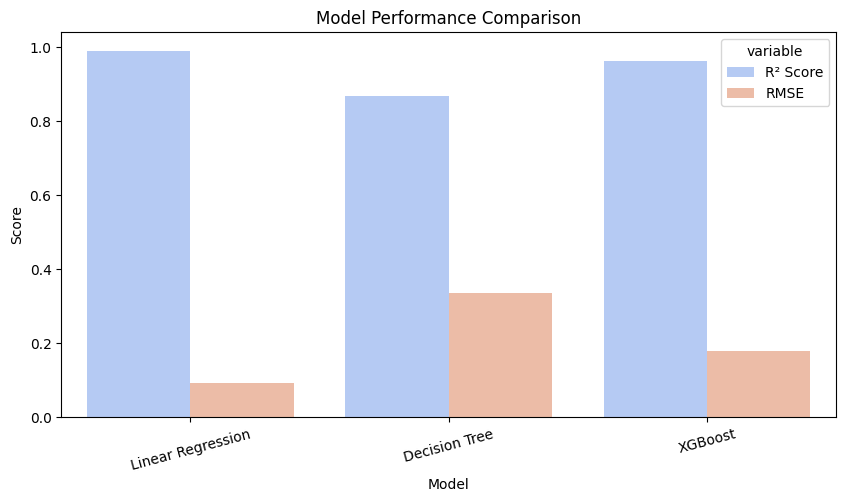

In [32]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "XGBoost"],
    "R2 Score": [r2_lr, r2_dtr, r2_xgbr],
    "RMSE": [rmse_lr, rmse_dtr, rmse_xgbr]
})
print(results.sort_values(by="R2 Score", ascending=False))

#  Visualize Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=results.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.show()

# **Final Verdict:**
* All the three models have performing decently with 85%+ accuracy.
* The best model among all the three models is Linear Regressor with 99.02% accuaracy.

# **Further Developments:**

1. Application of Ensemble Learning techniques to stack models for more robust perfomance, with application of more models like K-Neighbors Regressor and Support Vector machines.
2. Deployment of the models on cloud and development of web-application.